In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# !------------ 1 - Data Loading and Preperation -----------!

In [2]:
df1 = pd.read_csv('CTU-IoT-Malware-Capture-8-1.csv')  
df2 = pd.read_csv('CTU-IoT-Malware-Capture-20-1.csv')  
df3 = pd.read_csv('CTU-IoT-Malware-Capture-21-1.csv')  

df1.head()

,Unnamed: 0,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents label detailed-label
0,0,1.533043e+09,C5JLGOoxIw2dBZt47,192.168.100.113,123,81.2.254.224,123,udp,-,0.005490,...,SF,-,-,0,Dd,1,76,1,76,(empty) Benign -
1,1,1.533043e+09,Cf3cHf4jZr9nvD808i,192.168.100.113,123,147.231.100.5,123,udp,-,0.001741,...,SF,-,-,0,Dd,1,76,1,76,(empty) Benign -
2,2,1.533043e+09,CJgmSt3bSY6XwE9fzc,192.168.100.113,123,31.31.74.35,123,udp,-,0.004495,...,SF,-,-,0,Dd,1,76,1,76,(empty) Benign -
3,3,1.533043e+09,Cav32m4csR3OZYhShj,192.168.100.113,123,147.251.48.140,123,udp,-,0.006988,...,SF,-,-,0,Dd,1,76,1,76,(empty) Benign -
4,4,1.533043e+09,ClwPfA40tU9UT4nksg,192.168.100.113,123,147.231.100.5,123,udp,-,0.001487,...,SF,-,-,0,Dd,1,76,1,76,(empty) Benign -


In [5]:
df2.head()

,Unnamed: 0,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents label detailed-label
0,0,1.538479e+09,CSQG794riQ4XnzTxP2,192.168.100.103,37082,192.168.100.1,53,udp,dns,5.005151,...,S0,-,-,0,D,2,134,0,0,- Benign -
1,1,1.538479e+09,COTbdG2BhtGBlmf6r,192.168.100.103,34486,192.168.100.1,53,udp,dns,0.007243,...,SF,-,-,0,Dd,2,146,2,146,- Benign -
2,2,1.538479e+09,CP48WJ2HOnLuGtr5kb,192.168.100.103,37601,192.168.100.1,53,udp,dns,0.002250,...,SF,-,-,0,Dd,2,146,2,146,- Benign -
3,3,1.538479e+09,CeTMJi2TydRSaVdsG4,192.168.100.103,46439,192.168.100.1,53,udp,dns,5.005154,...,S0,-,-,0,D,2,134,0,0,- Benign -
4,4,1.538479e+09,CZ6ne24AN9WAg9XA9d,192.168.100.103,55174,192.168.100.1,53,udp,dns,0.002246,...,SF,-,-,0,Dd,2,146,2,146,- Benign -


In [7]:
df3.head()

,Unnamed: 0,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents label detailed-label
0,0,1.538573e+09,Cu3Tieri43IPsyBO3,192.168.100.113,42789,192.168.100.1,53,udp,dns,-,...,S0,-,-,0,D,1,67,0,0,- Benign -
1,1,1.538573e+09,Cbetl72NeXczaqQ8Lj,192.168.100.113,60546,192.168.100.1,53,udp,dns,0.001494,...,SF,-,-,0,Dd,2,146,2,146,- Benign -
2,2,1.538573e+09,CUmQWl2ZA2hrbNtohe,192.168.100.113,37320,192.168.100.1,53,udp,dns,5.005135,...,S0,-,-,0,D,2,134,0,0,- Benign -
3,3,1.538573e+09,C9oEZWtG35wx1Mqq5,192.168.100.113,51338,192.168.100.1,53,udp,dns,0.001483,...,SF,-,-,0,Dd,2,146,2,146,- Benign -
4,4,1.538573e+09,CbhqpU1oZZyrP7PE6i,192.168.100.113,60088,192.168.100.1,53,udp,dns,5.038625,...,SF,-,-,0,Dd,3,201,2,198,- Benign -


In [7]:
# combining dataframes

combined_df = pd.concat([df1, df2, df3], axis=0)

combined_df.head()

,Unnamed: 0,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents label detailed-label
0,0,1.533043e+09,C5JLGOoxIw2dBZt47,192.168.100.113,123,81.2.254.224,123,udp,-,0.005490,...,SF,-,-,0,Dd,1,76,1,76,(empty) Benign -
1,1,1.533043e+09,Cf3cHf4jZr9nvD808i,192.168.100.113,123,147.231.100.5,123,udp,-,0.001741,...,SF,-,-,0,Dd,1,76,1,76,(empty) Benign -
2,2,1.533043e+09,CJgmSt3bSY6XwE9fzc,192.168.100.113,123,31.31.74.35,123,udp,-,0.004495,...,SF,-,-,0,Dd,1,76,1,76,(empty) Benign -
3,3,1.533043e+09,Cav32m4csR3OZYhShj,192.168.100.113,123,147.251.48.140,123,udp,-,0.006988,...,SF,-,-,0,Dd,1,76,1,76,(empty) Benign -
4,4,1.533043e+09,ClwPfA40tU9UT4nksg,192.168.100.113,123,147.231.100.5,123,udp,-,0.001487,...,SF,-,-,0,Dd,1,76,1,76,(empty) Benign -


In [7]:
combined_df.columns

Index(['Unnamed: 0', 'ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h',
       'id.resp_p', 'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
       'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history',
       'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
       'tunnel_parents   label   detailed-label'],
      dtype='object')

In [9]:
combined_df['tunnel_parents   label   detailed-label']

0            (empty)   Benign   -
1            (empty)   Benign   -
2            (empty)   Benign   -
3            (empty)   Benign   -
4            (empty)   Benign   -
                  ...            
3281               -   Benign   -
3282               -   Benign   -
3283               -   Benign   -
3284               -   Benign   -
3285    -   Malicious   C&C-Torii
Name: tunnel_parents   label   detailed-label, Length: 16898, dtype: object

# changing name of target colummn 'tunnel_parents label detailed-label' to label'

In [9]:
combined_df['label'] = combined_df['tunnel_parents   label   detailed-label']

# Changing label names to make them easy to access

In [11]:
# Create a new column and apply transformations
def transform_label(label):
    if 'Malicious' in label:
        return 'malicious'
    elif 'Benign' in label:
        return 'benign'
    else:
        return label  # In case there are other labels, keep them as is


# Apply the transformation and create a new column called 'new_label'
combined_df['new_label'] = combined_df['label'].apply(transform_label)


# Check the updated DataFrame
print(combined_df['new_label'])

0          benign
1          benign
2          benign
3          benign
4          benign
          ...    
3281       benign
3282       benign
3283       benign
3284       benign
3285    malicious
Name: new_label, Length: 16898, dtype: object


# !------------- 2. EDA - Exploratory Data Analysis ---------------------!
"""

In EDA we have first checked the length and shape of the dataset and we have found that the dataset have 16898 records with 22 columns in the original dataframe. 

But after doing data preperation, we have 24 columns.

After checking length and the columns we have checked the statistics of the data data and the corellation between each columns, and the results are shown below. 

After that we have checked the data-type of each columns to check categorical and numerical columns which will be helpfull in our Data Pre-processing step.  

"""

In [179]:
combined_df.head()

,Unnamed: 0,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents label detailed-label,label,new_label
0,0,1.533043e+09,C5JLGOoxIw2dBZt47,192.168.100.113,123,81.2.254.224,123,udp,-,0.005490,...,-,0,Dd,1,76,1,76,(empty) Benign -,(empty) Benign -,benign
1,1,1.533043e+09,Cf3cHf4jZr9nvD808i,192.168.100.113,123,147.231.100.5,123,udp,-,0.001741,...,-,0,Dd,1,76,1,76,(empty) Benign -,(empty) Benign -,benign
2,2,1.533043e+09,CJgmSt3bSY6XwE9fzc,192.168.100.113,123,31.31.74.35,123,udp,-,0.004495,...,-,0,Dd,1,76,1,76,(empty) Benign -,(empty) Benign -,benign
3,3,1.533043e+09,Cav32m4csR3OZYhShj,192.168.100.113,123,147.251.48.140,123,udp,-,0.006988,...,-,0,Dd,1,76,1,76,(empty) Benign -,(empty) Benign -,benign
4,4,1.533043e+09,ClwPfA40tU9UT4nksg,192.168.100.113,123,147.231.100.5,123,udp,-,0.001487,...,-,0,Dd,1,76,1,76,(empty) Benign -,(empty) Benign -,benign


In [25]:
len(combined_df)

16898

In [27]:
combined_df.shape

(16898, 24)

In [29]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16898 entries, 0 to 3285
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               16898 non-null  int64  
 1   ts                                       16898 non-null  float64
 2   uid                                      16898 non-null  object 
 3   id.orig_h                                16898 non-null  object 
 4   id.orig_p                                16898 non-null  int64  
 5   id.resp_h                                16898 non-null  object 
 6   id.resp_p                                16898 non-null  int64  
 7   proto                                    16898 non-null  object 
 8   service                                  16898 non-null  object 
 9   duration                                 16898 non-null  object 
 10  orig_bytes                               16898 non-n

# Analysing count of values in each object feature variable

In [181]:
print(combined_df['local_orig'].value_counts())
print()

print(combined_df['local_resp'].value_counts())
print()

print(combined_df['service'].value_counts())
print()

print(combined_df['proto'].value_counts())
print()

print(combined_df['duration'].value_counts())
print()

print(combined_df['conn_state'].value_counts())
print()

print(combined_df['resp_bytes'].value_counts())
print()

print(combined_df['orig_bytes'].value_counts())
print()

print(combined_df['history'].value_counts())
print()


local_orig
-    16898
Name: count, dtype: int64

local_resp
-    16898
Name: count, dtype: int64

service
-      14382
dns     2516
Name: count, dtype: int64

proto
udp     8641
tcp     8256
icmp       1
Name: count, dtype: int64

duration
-               8231
0.000500         121
0.000749         110
0.001746         110
0.001747         104
                ... 
3.118973           1
3.148951           1
3.159706           1
3.098228           1
22388.393741       1
Name: count, Length: 3807, dtype: int64

conn_state
S0      11056
SF       5832
OTH         5
S1          2
RSTR        1
REJ         1
S2          1
Name: count, dtype: int64

resp_bytes
-        8231
48       4194
0        2831
45       1345
103       135
288        53
90         26
39         18
384        16
94         10
54          8
55          5
86          4
480         3
120         3
151         3
78          2
336         2
16438       1
14734       1
76          1
19431       1
440         1
142         1
59   

In [183]:
# 2. Exploratory Data Analysis (EDA)
# Summary statistics
summary_stats = combined_df.describe()

# Correlation matrix
#correlation_matrix = combined_df.corr()

summary_stats

,Unnamed: 0,ts,id.orig_p,id.resp_p,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
count,16898.000000,1.689800e+04,16898.000000,16898.000000,16898.000000,16898.000000,16898.000000,16898.000000,16898.000000
mean,3825.925790,1.535192e+09,26976.754882,77.908806,1.064919,3.357084,173.316250,2.502012,118.251805
std,2986.514281,2.662845e+06,20871.138838,55.625702,62.734661,121.243097,5100.308611,127.088896,5347.648566
min,0.000000,1.533043e+09,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1408.000000,1.533080e+09,123.000000,50.000000,0.000000,1.000000,60.000000,0.000000,0.000000
50%,2816.000000,1.533114e+09,36167.000000,53.000000,0.000000,1.000000,76.000000,0.000000,0.000000
75%,6177.750000,1.538536e+09,44664.000000,123.000000,0.000000,1.000000,76.000000,1.000000,76.000000
max,10402.000000,1.538659e+09,64923.000000,5355.000000,5390.000000,8872.000000,372893.000000,9307.000000,388975.000000


In [185]:
# checking the number of missing values
combined_df.isnull().sum()

Unnamed: 0                                 0
ts                                         0
uid                                        0
id.orig_h                                  0
id.orig_p                                  0
id.resp_h                                  0
id.resp_p                                  0
proto                                      0
service                                    0
duration                                   0
orig_bytes                                 0
resp_bytes                                 0
conn_state                                 0
local_orig                                 0
local_resp                                 0
missed_bytes                               0
history                                    0
orig_pkts                                  0
orig_ip_bytes                              0
resp_pkts                                  0
resp_ip_bytes                              0
tunnel_parents   label   detailed-label    0
label     

In [187]:
print(combined_df['new_label'].value_counts())

new_label
benign       8646
malicious    8252
Name: count, dtype: int64


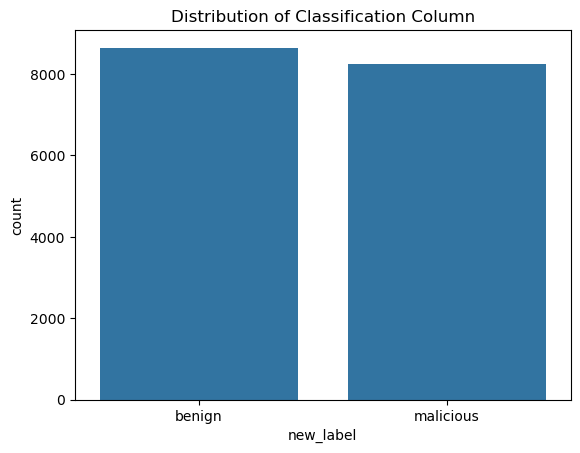

In [189]:
# Checking the distribution of the target variable
sns.countplot(x='new_label', data=combined_df)
plt.title('Distribution of Classification Column')
plt.show()

# Here the resulting pair plot shows:

 - Each subplot along the diagonal represents the distribution of a specific feature, with two overlaid histograms or kernel density plots—one for each diagnosis class.
 - Off-diagonal subplots show scatter plots between pairs of features, with points colored according to the diagnosis (M or B).  - These scatter plots help visualize potential patterns or separations between the two diagnosis classes.

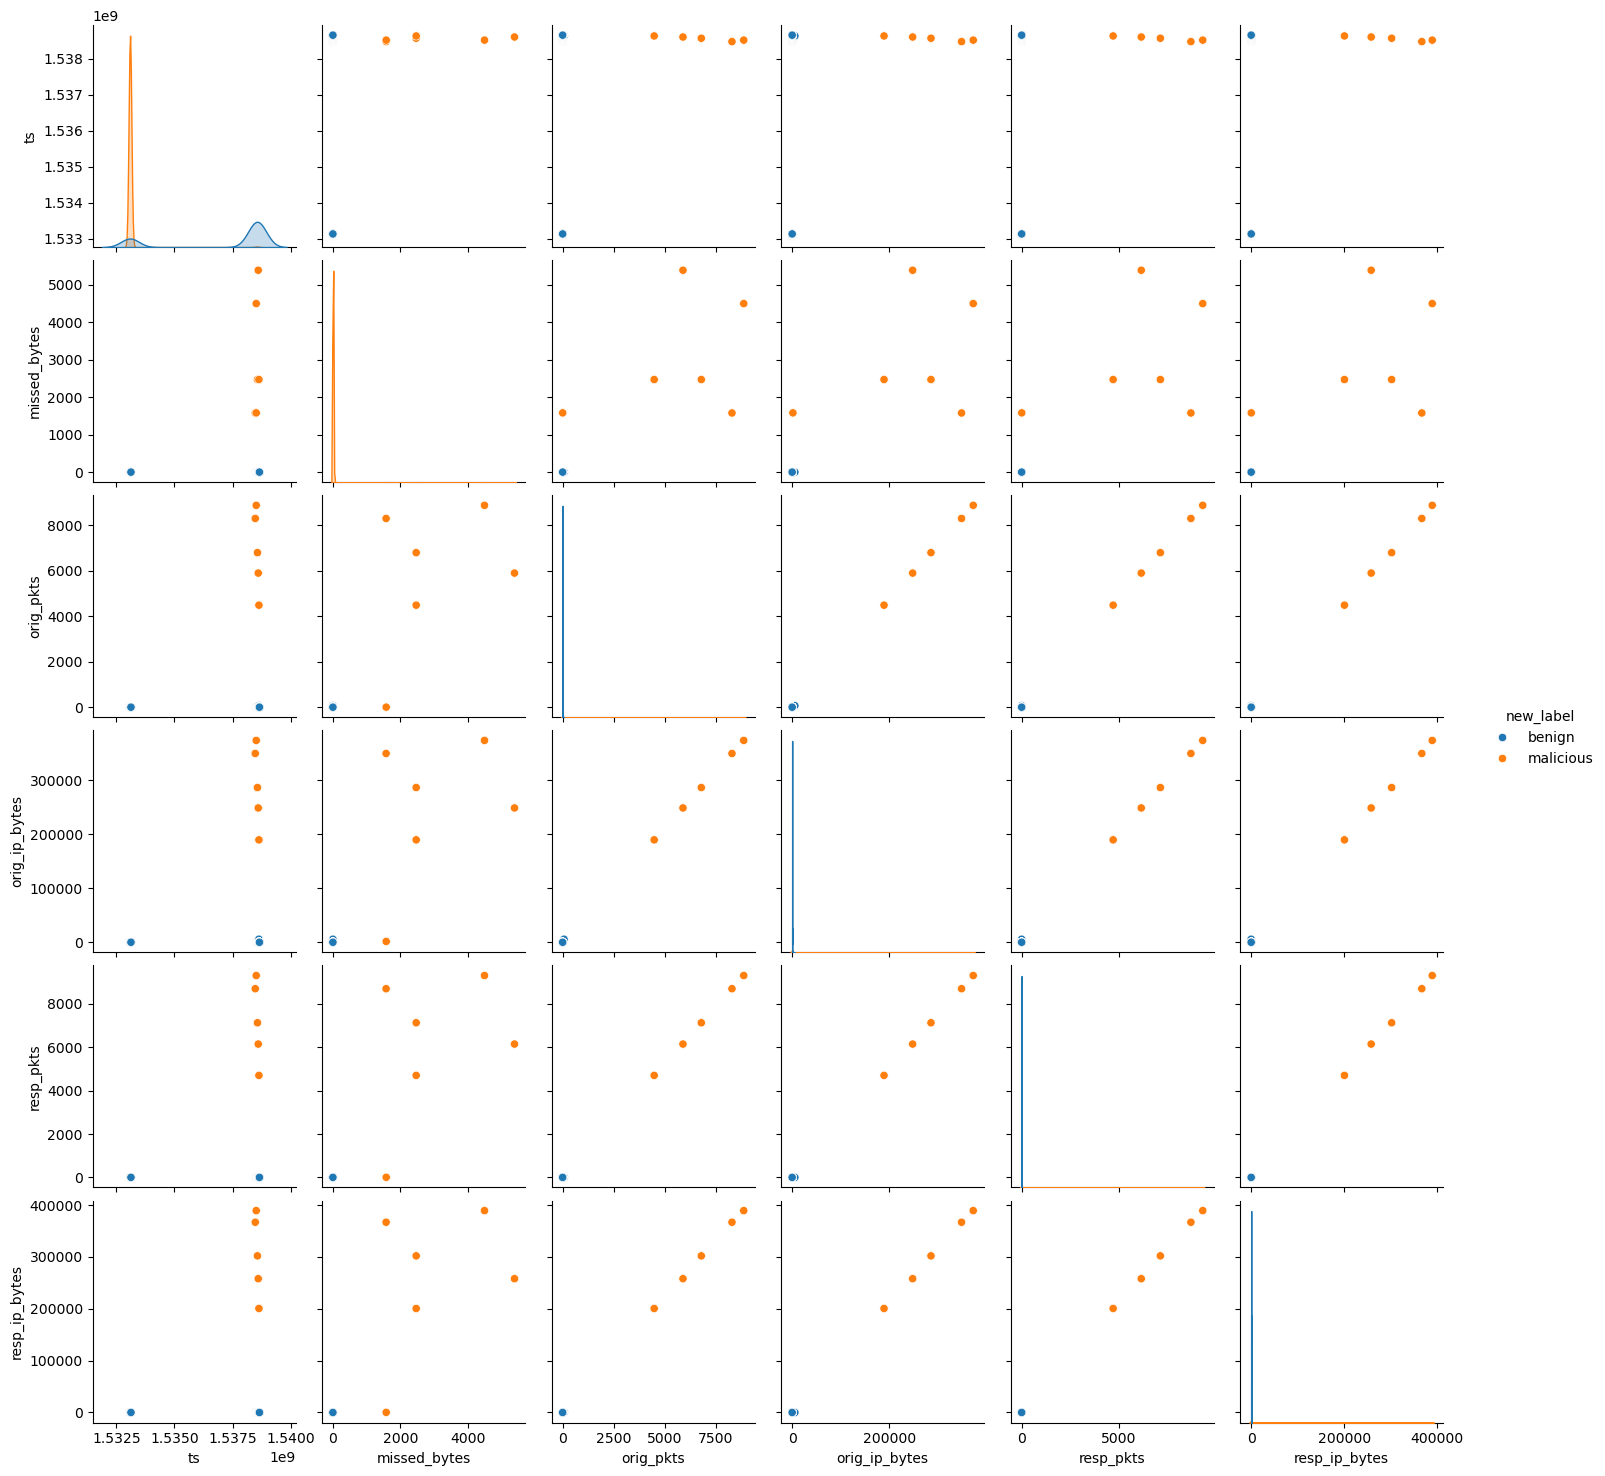

In [42]:
sns.pairplot(combined_df, hue = 'new_label',
             vars = ['ts', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes'])

# !---------------- 3. Data Pre-processing and Validation ---------------------!

"""

 - The data pre-processing step includes: conversion of categorical columns into numerical values which is in our case is "new_label".

 - After that we have applied train_test_split to split the dataset into training and testing data. We have splitted the dataset 
into 80% for training and 20% for testing. 
 - After that we have used standard scaler to stenderdise or normalise our numerical data. This step is mendatory to ensure that our data is on one scale. This is step is used while model training.

"""

In [44]:
combined_df.head()

,Unnamed: 0,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents label detailed-label,label,new_label
0,0,1.533043e+09,C5JLGOoxIw2dBZt47,192.168.100.113,123,81.2.254.224,123,udp,-,0.005490,...,-,0,Dd,1,76,1,76,(empty) Benign -,(empty) Benign -,benign
1,1,1.533043e+09,Cf3cHf4jZr9nvD808i,192.168.100.113,123,147.231.100.5,123,udp,-,0.001741,...,-,0,Dd,1,76,1,76,(empty) Benign -,(empty) Benign -,benign
2,2,1.533043e+09,CJgmSt3bSY6XwE9fzc,192.168.100.113,123,31.31.74.35,123,udp,-,0.004495,...,-,0,Dd,1,76,1,76,(empty) Benign -,(empty) Benign -,benign
3,3,1.533043e+09,Cav32m4csR3OZYhShj,192.168.100.113,123,147.251.48.140,123,udp,-,0.006988,...,-,0,Dd,1,76,1,76,(empty) Benign -,(empty) Benign -,benign
4,4,1.533043e+09,ClwPfA40tU9UT4nksg,192.168.100.113,123,147.231.100.5,123,udp,-,0.001487,...,-,0,Dd,1,76,1,76,(empty) Benign -,(empty) Benign -,benign


In [17]:
services_dns = combined_df[combined_df['service'] == 'dns']

services_dns['id.resp_p']

0       53
1       53
2       53
3       53
4       53
        ..
3140    53
3141    53
3142    53
3143    53
3144    53
Name: id.resp_p, Length: 2516, dtype: int64

In [21]:
combined_df['id.resp_p'].value_counts()

id.resp_p
50      8222
123     6125
53      2515
443       30
22         4
5355       1
0          1
Name: count, dtype: int64

In [54]:
combined_df['id.orig_p'].value_counts()

id.orig_p
123      6125
38096       7
38088       7
46412       6
34924       6
         ... 
41886       1
59826       1
55132       1
39863       1
41186       1
Name: count, Length: 4302, dtype: int64

# excluding extra columns from the dataset

In [13]:
dropped_df = combined_df.drop(['Unnamed: 0', 'tunnel_parents   label   detailed-label', 'label', 'uid', 'id.orig_h','ts', 'service'], 
                              axis=1)

In [15]:
dropped_df

,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,new_label
0,123,81.2.254.224,123,udp,0.005490,48,48,SF,-,-,0,Dd,1,76,1,76,benign
1,123,147.231.100.5,123,udp,0.001741,48,48,SF,-,-,0,Dd,1,76,1,76,benign
2,123,31.31.74.35,123,udp,0.004495,48,48,SF,-,-,0,Dd,1,76,1,76,benign
3,123,147.251.48.140,123,udp,0.006988,48,48,SF,-,-,0,Dd,1,76,1,76,benign
4,123,147.231.100.5,123,udp,0.001487,48,48,SF,-,-,0,Dd,1,76,1,76,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,123,213.199.225.40,123,udp,-,-,-,S0,-,-,0,D,1,76,0,0,benign
3282,123,89.221.212.46,123,udp,-,-,-,S0,-,-,0,D,1,76,0,0,benign
3283,123,77.78.107.252,123,udp,0.001990,48,48,SF,-,-,0,Dd,1,76,1,76,benign
3284,123,81.2.254.32,123,udp,-,-,-,S0,-,-,0,D,1,76,0,0,benign


# Dropping Null rows

In [17]:
dropped_df = dropped_df.dropna(axis=0)

dropped_df

,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,new_label
0,123,81.2.254.224,123,udp,0.005490,48,48,SF,-,-,0,Dd,1,76,1,76,benign
1,123,147.231.100.5,123,udp,0.001741,48,48,SF,-,-,0,Dd,1,76,1,76,benign
2,123,31.31.74.35,123,udp,0.004495,48,48,SF,-,-,0,Dd,1,76,1,76,benign
3,123,147.251.48.140,123,udp,0.006988,48,48,SF,-,-,0,Dd,1,76,1,76,benign
4,123,147.231.100.5,123,udp,0.001487,48,48,SF,-,-,0,Dd,1,76,1,76,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,123,213.199.225.40,123,udp,-,-,-,S0,-,-,0,D,1,76,0,0,benign
3282,123,89.221.212.46,123,udp,-,-,-,S0,-,-,0,D,1,76,0,0,benign
3283,123,77.78.107.252,123,udp,0.001990,48,48,SF,-,-,0,Dd,1,76,1,76,benign
3284,123,81.2.254.32,123,udp,-,-,-,S0,-,-,0,D,1,76,0,0,benign


In [19]:
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16898 entries, 0 to 3285
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id.orig_p      16898 non-null  int64 
 1   id.resp_h      16898 non-null  object
 2   id.resp_p      16898 non-null  int64 
 3   proto          16898 non-null  object
 4   duration       16898 non-null  object
 5   orig_bytes     16898 non-null  object
 6   resp_bytes     16898 non-null  object
 7   conn_state     16898 non-null  object
 8   local_orig     16898 non-null  object
 9   local_resp     16898 non-null  object
 10  missed_bytes   16898 non-null  int64 
 11  history        16898 non-null  object
 12  orig_pkts      16898 non-null  int64 
 13  orig_ip_bytes  16898 non-null  int64 
 14  resp_pkts      16898 non-null  int64 
 15  resp_ip_bytes  16898 non-null  int64 
 16  new_label      16898 non-null  object
dtypes: int64(7), object(10)
memory usage: 2.3+ MB


# Replacing '-' values which are present in the categorical columns with NaN 

In [21]:
import numpy as np

# Replace '-' with NaN
dropped_nan_df = dropped_df.replace('-', np.nan)

dropped_nan_df

C:\Users\pc\AppData\Local\Temp\ipykernel_23324\2735094922.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dropped_nan_df = dropped_df.replace('-', np.nan)


,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,new_label
0,123,81.2.254.224,123,udp,0.005490,48,48,SF,NaN,NaN,0,Dd,1,76,1,76,benign
1,123,147.231.100.5,123,udp,0.001741,48,48,SF,NaN,NaN,0,Dd,1,76,1,76,benign
2,123,31.31.74.35,123,udp,0.004495,48,48,SF,NaN,NaN,0,Dd,1,76,1,76,benign
3,123,147.251.48.140,123,udp,0.006988,48,48,SF,NaN,NaN,0,Dd,1,76,1,76,benign
4,123,147.231.100.5,123,udp,0.001487,48,48,SF,NaN,NaN,0,Dd,1,76,1,76,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,123,213.199.225.40,123,udp,NaN,NaN,NaN,S0,NaN,NaN,0,D,1,76,0,0,benign
3282,123,89.221.212.46,123,udp,NaN,NaN,NaN,S0,NaN,NaN,0,D,1,76,0,0,benign
3283,123,77.78.107.252,123,udp,0.001990,48,48,SF,NaN,NaN,0,Dd,1,76,1,76,benign
3284,123,81.2.254.32,123,udp,NaN,NaN,NaN,S0,NaN,NaN,0,D,1,76,0,0,benign


In [23]:
dropped_nan_df.isna().sum()

id.orig_p            0
id.resp_h            0
id.resp_p            0
proto                0
duration          8231
orig_bytes        8231
resp_bytes        8231
conn_state           0
local_orig       16898
local_resp       16898
missed_bytes         0
history              1
orig_pkts            0
orig_ip_bytes        0
resp_pkts            0
resp_ip_bytes        0
new_label            0
dtype: int64

# Now excluding those columns which has all null values: local_orig, local_resp

In [25]:
dropped_excluded_df = dropped_nan_df.drop(['local_orig', 'local_resp'], axis=1)

dropped_excluded_df

,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,new_label
0,123,81.2.254.224,123,udp,0.005490,48,48,SF,0,Dd,1,76,1,76,benign
1,123,147.231.100.5,123,udp,0.001741,48,48,SF,0,Dd,1,76,1,76,benign
2,123,31.31.74.35,123,udp,0.004495,48,48,SF,0,Dd,1,76,1,76,benign
3,123,147.251.48.140,123,udp,0.006988,48,48,SF,0,Dd,1,76,1,76,benign
4,123,147.231.100.5,123,udp,0.001487,48,48,SF,0,Dd,1,76,1,76,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,123,213.199.225.40,123,udp,NaN,NaN,NaN,S0,0,D,1,76,0,0,benign
3282,123,89.221.212.46,123,udp,NaN,NaN,NaN,S0,0,D,1,76,0,0,benign
3283,123,77.78.107.252,123,udp,0.001990,48,48,SF,0,Dd,1,76,1,76,benign
3284,123,81.2.254.32,123,udp,NaN,NaN,NaN,S0,0,D,1,76,0,0,benign


# converting those object columns into float which are tends to be float because there values are continous not discrete 

In [29]:
print(dropped_excluded_df['id.resp_h'].value_counts())
print()

print(dropped_excluded_df['proto'].value_counts())
print()

print(dropped_excluded_df['duration'].value_counts())
print()

print(dropped_excluded_df['conn_state'].value_counts())
print()

print(dropped_excluded_df['resp_bytes'].value_counts())
print()

print(dropped_excluded_df['orig_bytes'].value_counts())
print()

print(dropped_excluded_df['history'].value_counts())
print()


id.resp_h
178.128.185.250    4112
128.185.250.50     4110
192.168.100.1      2444
147.231.100.5      1343
217.30.75.147      1304
89.221.214.130      314
81.2.254.224        291
83.167.252.118      250
77.78.107.252       235
31.31.74.35         229
185.189.115.149     223
37.157.198.150      215
89.221.210.188      200
89.221.212.46       176
213.199.225.40      176
147.251.48.140      169
194.182.76.214      164
81.2.254.32         157
80.79.25.111        150
37.157.194.44       111
37.187.104.44       100
5.1.56.123           92
8.8.8.8              71
66.85.157.90         30
91.216.168.42        25
212.96.160.147       25
195.113.144.201      22
94.124.107.190       22
78.108.102.237       17
78.108.145.1         17
81.2.248.189         16
194.182.80.233       15
81.0.208.219         14
80.211.195.36        12
81.200.57.13         11
88.208.76.68          5
109.224.76.139        4
192.168.100.113       4
81.200.60.11          2
192.168.100.103       2
46.36.38.43           2
46.28.

In [31]:
# Convert the columns to float type
dropped_excluded_df[['duration', 'resp_bytes', 'orig_bytes']] = dropped_excluded_df[['duration', 'resp_bytes', 'orig_bytes']].astype(float)
dropped_excluded_df[['id.orig_p', 'id.resp_p']] = dropped_excluded_df[['id.orig_p', 'id.resp_p']].astype(object)

dropped_excluded_df

,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,new_label
0,123,81.2.254.224,123,udp,0.005490,48.0,48.0,SF,0,Dd,1,76,1,76,benign
1,123,147.231.100.5,123,udp,0.001741,48.0,48.0,SF,0,Dd,1,76,1,76,benign
2,123,31.31.74.35,123,udp,0.004495,48.0,48.0,SF,0,Dd,1,76,1,76,benign
3,123,147.251.48.140,123,udp,0.006988,48.0,48.0,SF,0,Dd,1,76,1,76,benign
4,123,147.231.100.5,123,udp,0.001487,48.0,48.0,SF,0,Dd,1,76,1,76,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,123,213.199.225.40,123,udp,NaN,NaN,NaN,S0,0,D,1,76,0,0,benign
3282,123,89.221.212.46,123,udp,NaN,NaN,NaN,S0,0,D,1,76,0,0,benign
3283,123,77.78.107.252,123,udp,0.001990,48.0,48.0,SF,0,Dd,1,76,1,76,benign
3284,123,81.2.254.32,123,udp,NaN,NaN,NaN,S0,0,D,1,76,0,0,benign


In [33]:
dropped_excluded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16898 entries, 0 to 3285
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id.orig_p      16898 non-null  object 
 1   id.resp_h      16898 non-null  object 
 2   id.resp_p      16898 non-null  object 
 3   proto          16898 non-null  object 
 4   duration       8667 non-null   float64
 5   orig_bytes     8667 non-null   float64
 6   resp_bytes     8667 non-null   float64
 7   conn_state     16898 non-null  object 
 8   missed_bytes   16898 non-null  int64  
 9   history        16897 non-null  object 
 10  orig_pkts      16898 non-null  int64  
 11  orig_ip_bytes  16898 non-null  int64  
 12  resp_pkts      16898 non-null  int64  
 13  resp_ip_bytes  16898 non-null  int64  
 14  new_label      16898 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 2.1+ MB


# Now filling null values by using simpleImputer library:
 - taking median values for numerical columns to fill
 - taking most frequent values for categorical columns to fill

In [35]:
dropped_excluded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16898 entries, 0 to 3285
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id.orig_p      16898 non-null  object 
 1   id.resp_h      16898 non-null  object 
 2   id.resp_p      16898 non-null  object 
 3   proto          16898 non-null  object 
 4   duration       8667 non-null   float64
 5   orig_bytes     8667 non-null   float64
 6   resp_bytes     8667 non-null   float64
 7   conn_state     16898 non-null  object 
 8   missed_bytes   16898 non-null  int64  
 9   history        16897 non-null  object 
 10  orig_pkts      16898 non-null  int64  
 11  orig_ip_bytes  16898 non-null  int64  
 12  resp_pkts      16898 non-null  int64  
 13  resp_ip_bytes  16898 non-null  int64  
 14  new_label      16898 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 2.1+ MB


In [37]:
from sklearn.impute import SimpleImputer

# Separate numerical and categorical columns
numerical_cols = ['missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 
                  'duration', 'resp_bytes', 'orig_bytes'] 
categorical_cols = ['id.orig_p', 'id.resp_h', 'id.resp_p', 'proto', 'conn_state', 'history'] 


# Impute missing values for numerical columns with median
num_imputer = SimpleImputer(strategy='median')
dropped_excluded_df[numerical_cols] = num_imputer.fit_transform(dropped_excluded_df[numerical_cols])


# Impute missing values for categorical columns with the most frequent value (mode)
cat_imputer = SimpleImputer(strategy='most_frequent')
dropped_excluded_df[categorical_cols] = cat_imputer.fit_transform(dropped_excluded_df[categorical_cols])


In [39]:
dropped_excluded_df

,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,new_label
0,123,81.2.254.224,123,udp,0.005490,48.0,48.0,SF,0.0,Dd,1.0,76.0,1.0,76.0,benign
1,123,147.231.100.5,123,udp,0.001741,48.0,48.0,SF,0.0,Dd,1.0,76.0,1.0,76.0,benign
2,123,31.31.74.35,123,udp,0.004495,48.0,48.0,SF,0.0,Dd,1.0,76.0,1.0,76.0,benign
3,123,147.251.48.140,123,udp,0.006988,48.0,48.0,SF,0.0,Dd,1.0,76.0,1.0,76.0,benign
4,123,147.231.100.5,123,udp,0.001487,48.0,48.0,SF,0.0,Dd,1.0,76.0,1.0,76.0,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,123,213.199.225.40,123,udp,0.006987,48.0,48.0,S0,0.0,D,1.0,76.0,0.0,0.0,benign
3282,123,89.221.212.46,123,udp,0.006987,48.0,48.0,S0,0.0,D,1.0,76.0,0.0,0.0,benign
3283,123,77.78.107.252,123,udp,0.001990,48.0,48.0,SF,0.0,Dd,1.0,76.0,1.0,76.0,benign
3284,123,81.2.254.32,123,udp,0.006987,48.0,48.0,S0,0.0,D,1.0,76.0,0.0,0.0,benign


In [41]:
dropped_excluded_df.missed_bytes

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
         ...  
3281       0.0
3282       0.0
3283       0.0
3284       0.0
3285    2472.0
Name: missed_bytes, Length: 16898, dtype: float64

In [43]:
dropped_excluded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16898 entries, 0 to 3285
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id.orig_p      16898 non-null  object 
 1   id.resp_h      16898 non-null  object 
 2   id.resp_p      16898 non-null  object 
 3   proto          16898 non-null  object 
 4   duration       16898 non-null  float64
 5   orig_bytes     16898 non-null  float64
 6   resp_bytes     16898 non-null  float64
 7   conn_state     16898 non-null  object 
 8   missed_bytes   16898 non-null  float64
 9   history        16898 non-null  object 
 10  orig_pkts      16898 non-null  float64
 11  orig_ip_bytes  16898 non-null  float64
 12  resp_pkts      16898 non-null  float64
 13  resp_ip_bytes  16898 non-null  float64
 14  new_label      16898 non-null  object 
dtypes: float64(8), object(7)
memory usage: 2.1+ MB


# Converting categorical variables into encoded variables

In [45]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Assuming df is your dataframe and these are the remaining categorical columns
categorical_columns = ['id.orig_p', 'id.resp_h', 'id.resp_p', 'proto', 'conn_state', 'history']

# making copy of our df
encoded_df = dropped_excluded_df

# Apply Label Encoding for ordinal columns
label_encoder = LabelEncoder()

dropped_excluded_df[categorical_columns[0]] = label_encoder.fit_transform(dropped_excluded_df[categorical_columns[0]])
dropped_excluded_df[categorical_columns[1]] = label_encoder.fit_transform(dropped_excluded_df[categorical_columns[1]])
dropped_excluded_df[categorical_columns[2]] = label_encoder.fit_transform(dropped_excluded_df[categorical_columns[2]])
dropped_excluded_df[categorical_columns[3]] = label_encoder.fit_transform(dropped_excluded_df[categorical_columns[3]])
dropped_excluded_df[categorical_columns[4]] = label_encoder.fit_transform(dropped_excluded_df[categorical_columns[4]])
dropped_excluded_df[categorical_columns[5]] = label_encoder.fit_transform(dropped_excluded_df[categorical_columns[5]])


dropped_excluded_df

,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,new_label
0,1,43,4,2,0.005490,48.0,48.0,6,0.0,2,1.0,76.0,1.0,76.0,benign
1,1,5,4,2,0.001741,48.0,48.0,6,0.0,2,1.0,76.0,1.0,76.0,benign
2,1,22,4,2,0.004495,48.0,48.0,6,0.0,2,1.0,76.0,1.0,76.0,benign
3,1,6,4,2,0.006988,48.0,48.0,6,0.0,2,1.0,76.0,1.0,76.0,benign
4,1,5,4,2,0.001487,48.0,48.0,6,0.0,2,1.0,76.0,1.0,76.0,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,1,20,4,2,0.006987,48.0,48.0,3,0.0,0,1.0,76.0,0.0,0.0,benign
3282,1,51,4,2,0.006987,48.0,48.0,3,0.0,0,1.0,76.0,0.0,0.0,benign
3283,1,35,4,2,0.001990,48.0,48.0,6,0.0,2,1.0,76.0,1.0,76.0,benign
3284,1,44,4,2,0.006987,48.0,48.0,3,0.0,0,1.0,76.0,0.0,0.0,benign


In [47]:
dropped_excluded_df.conn_state.value_counts()

conn_state
3    11056
6     5832
0        5
4        2
2        1
1        1
5        1
Name: count, dtype: int64

In [49]:
# converting target column labels into numerical labels

dropped_excluded_df['new_label'] = label_encoder.fit_transform(dropped_excluded_df['new_label'])

dropped_excluded_df

,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,new_label
0,1,43,4,2,0.005490,48.0,48.0,6,0.0,2,1.0,76.0,1.0,76.0,0
1,1,5,4,2,0.001741,48.0,48.0,6,0.0,2,1.0,76.0,1.0,76.0,0
2,1,22,4,2,0.004495,48.0,48.0,6,0.0,2,1.0,76.0,1.0,76.0,0
3,1,6,4,2,0.006988,48.0,48.0,6,0.0,2,1.0,76.0,1.0,76.0,0
4,1,5,4,2,0.001487,48.0,48.0,6,0.0,2,1.0,76.0,1.0,76.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,1,20,4,2,0.006987,48.0,48.0,3,0.0,0,1.0,76.0,0.0,0.0,0
3282,1,51,4,2,0.006987,48.0,48.0,3,0.0,0,1.0,76.0,0.0,0.0,0
3283,1,35,4,2,0.001990,48.0,48.0,6,0.0,2,1.0,76.0,1.0,76.0,0
3284,1,44,4,2,0.006987,48.0,48.0,3,0.0,0,1.0,76.0,0.0,0.0,0


In [51]:
dropped_excluded_df.new_label.value_counts()

new_label
0    8646
1    8252
Name: count, dtype: int64

# Balancing the dataset by taking min sample from the target variable - 'new_label'

In [53]:
min_sample = 8252


balanced_df = dropped_excluded_df.groupby('new_label').apply(lambda x: x.sample(min_sample)).reset_index(drop=True)

balanced_df

C:\Users\pc\AppData\Local\Temp\ipykernel_23324\3712912315.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = dropped_excluded_df.groupby('new_label').apply(lambda x: x.sample(min_sample)).reset_index(drop=True)


,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,new_label
0,1686,10,3,2,5.005152,78.0,0.0,3,0.0,0,2.0,134.0,0.0,0.0,0
1,1,44,4,2,0.005753,48.0,48.0,6,0.0,2,1.0,76.0,1.0,76.0,0
2,1,19,4,2,0.006987,48.0,48.0,3,0.0,0,1.0,76.0,0.0,0.0,0
3,1,47,4,2,0.097946,48.0,48.0,6,0.0,2,1.0,76.0,1.0,76.0,0
4,1,24,4,2,0.004984,48.0,48.0,6,0.0,2,1.0,76.0,1.0,76.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16499,2005,7,2,1,0.006987,48.0,48.0,3,0.0,3,1.0,60.0,0.0,0.0,1
16500,690,2,2,1,0.006987,48.0,48.0,3,0.0,3,1.0,60.0,0.0,0.0,1
16501,482,2,2,1,0.006987,48.0,48.0,3,0.0,3,1.0,60.0,0.0,0.0,1
16502,1340,2,2,1,0.006987,48.0,48.0,3,0.0,3,1.0,60.0,0.0,0.0,1


In [55]:
balanced_df.new_label.value_counts()

new_label
0    8252
1    8252
Name: count, dtype: int64

# !-------------------- 4 - feature extractrion and data split ----------------!

In [57]:
# Define X (features) and y (target)
X = dropped_excluded_df.drop('new_label', axis=1)  # Drop the new_label column to get the features
y = dropped_excluded_df['new_label']  # Target variable 'new_label'


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standerdizing feature

In [59]:
# Standerdizing feature for Supervised Learning phase
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Standerdizing feature for UN-Supervised Learning phase
X_scaled_USP = scaler.transform(X)

In [61]:
# Train a RandomForestClassifier model to get relevent features
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


# Get feature importances
importances = model.feature_importances_

print(importances)

[6.47763883e-02 1.08027054e-01 1.37452364e-01 1.98095975e-01
 1.53351585e-02 1.79914360e-02 7.52637223e-05 4.60621280e-02
 1.07258504e-04 2.61228391e-01 8.39824146e-03 1.03307427e-01
 2.34367239e-02 1.57061903e-02]


Feature Importance:
           Feature  Importance
9         history    0.261228
3           proto    0.198096
2       id.resp_p    0.137452
1       id.resp_h    0.108027
11  orig_ip_bytes    0.103307
0       id.orig_p    0.064776
7      conn_state    0.046062
12      resp_pkts    0.023437
5      orig_bytes    0.017991
13  resp_ip_bytes    0.015706
4        duration    0.015335
10      orig_pkts    0.008398
8    missed_bytes    0.000107
6      resp_bytes    0.000075


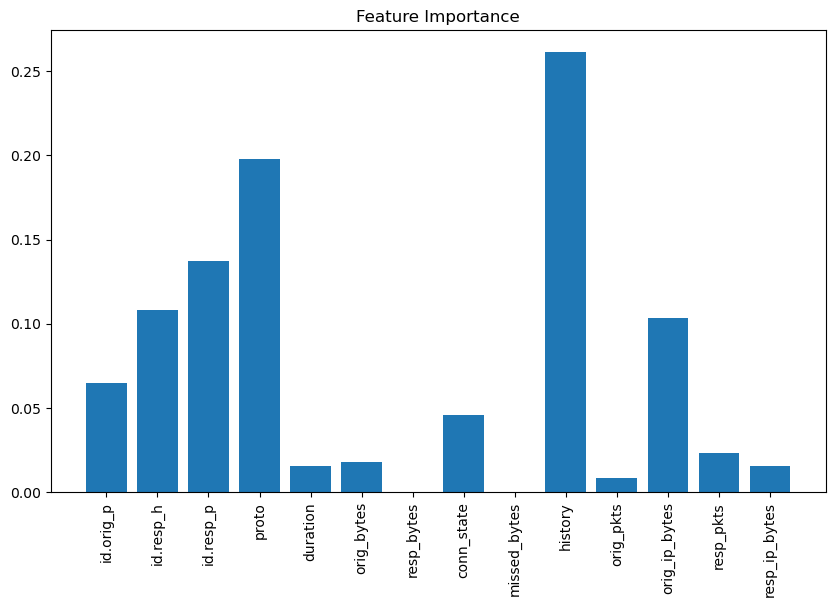

In [63]:
# Create a DataFrame to display feature importances alongside their column names
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})


# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", feature_importance_df)


# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(X.columns, importances)
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.show()

In [111]:
from sklearn.feature_selection import SelectFromModel

# Select features based on importance using SelectFromModel
selector = SelectFromModel(model, threshold="median", prefit=True)  # Only features with importance above mean are kept
X_selected = selector.transform(X)  # This will give the transformed dataset with selected features

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

print("Selected Features:\n", selected_features)

Selected Features:
 Index(['id.orig_p', 'id.resp_h', 'id.resp_p', 'proto', 'conn_state', 'history',
       'orig_ip_bytes'],
      dtype='object')


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


# Creating new X dataset by selecting columns as per the feature importance

In [113]:
X_sel_features = X[selected_features]

X_sel_features

,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,history,orig_ip_bytes
0,1,43,4,2,6,2,76.0
1,1,5,4,2,6,2,76.0
2,1,22,4,2,6,2,76.0
3,1,6,4,2,6,2,76.0
4,1,5,4,2,6,2,76.0
...,...,...,...,...,...,...,...
3281,1,20,4,2,3,0,76.0
3282,1,51,4,2,3,0,76.0
3283,1,35,4,2,6,2,76.0
3284,1,44,4,2,3,0,76.0


# Splitting the dataset for selected features and doing Scaling of selected features

In [144]:
# Split data into training and test sets
X_train_sel_features, X_test_sel_features, y_train_sel_features, y_test_sel_features = train_test_split(
    X_sel_features, y, test_size=0.2, random_state=42
)

In [117]:
X_train

,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
4004,1,22,4,2,0.004496,48.0,48.0,6,0.0,2,1.0,76.0,1.0,76.0
2769,2193,7,2,1,0.006987,48.0,48.0,3,0.0,3,1.0,60.0,0.0,0.0
388,1,5,4,2,0.001744,48.0,48.0,6,0.0,2,1.0,76.0,1.0,76.0
1953,2084,7,2,1,0.006987,48.0,48.0,3,0.0,3,1.0,60.0,0.0,0.0
7475,1043,2,2,1,0.006987,48.0,48.0,3,0.0,3,1.0,60.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,1,21,4,2,0.003489,48.0,48.0,6,0.0,2,1.0,76.0,1.0,76.0
1561,17,10,3,2,0.019738,45.0,45.0,6,0.0,2,1.0,73.0,1.0,73.0
5390,2510,7,2,1,0.006987,48.0,48.0,3,0.0,3,1.0,60.0,0.0,0.0
860,1,5,4,2,0.001743,48.0,48.0,6,0.0,2,1.0,76.0,1.0,76.0


In [119]:
X_train_sel_features

,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,history,orig_ip_bytes
4004,1,22,4,2,6,2,76.0
2769,2193,7,2,1,3,3,60.0
388,1,5,4,2,6,2,76.0
1953,2084,7,2,1,3,3,60.0
7475,1043,2,2,1,3,3,60.0
...,...,...,...,...,...,...,...
881,1,21,4,2,6,2,76.0
1561,17,10,3,2,6,2,73.0
5390,2510,7,2,1,3,3,60.0
860,1,5,4,2,6,2,76.0


In [75]:
y_train

4004    0
2769    1
388     0
1953    1
7475    1
       ..
881     0
1561    0
5390    1
860     0
2183    0
Name: new_label, Length: 13518, dtype: int32

In [146]:
# Standerdizing feature for Supervised Learning phase
scaler_sel_features = StandardScaler()

X_train_scaled_sel_features = scaler_sel_features.fit_transform(X_train_sel_features)
X_test_scaled_sel_features = scaler_sel_features.transform(X_test_sel_features)

# Standerdizing feature for UN-Supervised Learning phase
X_scaled_USP_sel_features = scaler_sel_features.transform(X_sel_features)

# 5 - Un-Supervised Learning Phase --- Clustering and PCA
# Also Calculating silhouette score and Doing Visualisation

# Before feature importance

Silhouette Score - K-means: 0.9863944205903327


Text(0.5, 1.0, 'K-means Clustering')

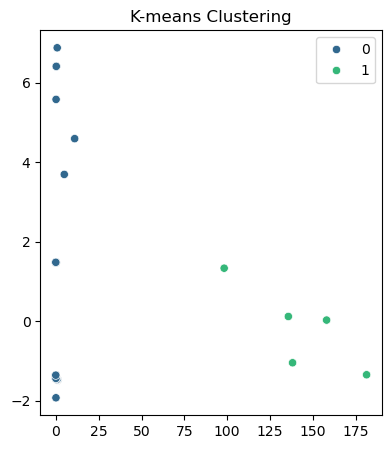

In [109]:
# Doing Clustering using K-means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled_USP)

# Using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_USP)

# Silhouette Score
silhouette_kmeans = silhouette_score(X_scaled_USP, kmeans_labels)
print(f'Silhouette Score - K-means: {silhouette_kmeans}')

# Visualizing the clusters in reduced dimensionality using PCA
# K-means
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis', legend='full')
plt.title('K-means Clustering')

# After feature importance

Silhouette Score - K-means: 0.7992253142058883


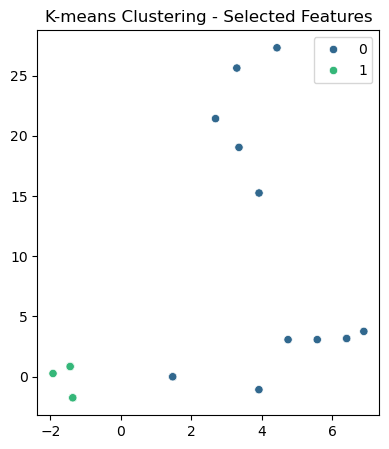

In [113]:
# Doing Clustering using K-means
kmeans_sf = KMeans(n_clusters=2, random_state=42)
kmeans_labels_sf = kmeans_sf.fit_predict(X_scaled_USP_sel_features)

# Using PCA for dimensionality reduction
pca_sf = PCA(n_components=2)
X_pca_sf = pca_sf.fit_transform(X_scaled_USP_sel_features)

# Silhouette Score
silhouette_kmeans_sf = silhouette_score(X_scaled_USP_sel_features, kmeans_labels_sf)
print(f'Silhouette Score - K-means: {silhouette_kmeans_sf}')

# Visualizing the clusters in reduced dimensionality using PCA
# K-means
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x=X_pca_sf[:, 0], y=X_pca_sf[:, 1], hue=kmeans_labels_sf, palette='viridis', legend='full')
plt.title('K-means Clustering - Selected Features')



# # Clustering using Agglomerative Hierarchical Clustering
# hierarchical = AgglomerativeClustering(n_clusters=4)
# hierarchical_labels = hierarchical.fit_predict(X_scaled_USP)

# # Clustering using DBScan
# dbscan = DBSCAN(eps=1.5, min_samples=5)
# dbscan_labels = dbscan.fit_predict(X_scaled_USP)


# # Hierarchical
# plt.subplot(1, 3, 2)
# sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=hierarchical_labels, palette='viridis', legend='full')
# plt.title('Hierarchical Clustering')

# # DBScan
# plt.subplot(1, 3, 3)
# sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette='viridis', legend='full')
# plt.title('DBScan Clustering')

plt.show()

# !-------------- 6. Supervised Model Training and Validation ------------------!

"""

We have taken 4 models: Random Forest Classifier, Logistic Regression, Support Vector Machine Classifier, Naive Bayes Classifier to get the best accuracy out of these 4 models. 

"""

# Before feature importance

In [123]:
# Random Forest Classifier
RF_model = RandomForestClassifier(random_state=42)
RF_model.fit(X_train_scaled, y_train)
RF_model_pred = RF_model.predict(X_test_scaled)


# Logistic Regression Model
LR_model = LogisticRegression(random_state=42)
LR_model.fit(X_train_scaled, y_train)
LR_model_pred = LR_model.predict(X_test_scaled)


# Support Vector Machine Classifier
SVC_model = SVC(random_state=42)
SVC_model.fit(X_train_scaled, y_train)
SVC_model_pred = SVC_model.predict(X_test_scaled)


# Naive Bayes Classifier
NB_model = GaussianNB()
NB_model.fit(X_train_scaled, y_train)
NB_model_pred = NB_model.predict(X_test_scaled)

In [124]:
print("Random Forest: " + f"{RF_model_pred[0]}")
print("Logistic Regression: " + f"{LR_model_pred[0]}")
print("SVC: " + f"{SVC_model_pred[0]}")
print("NB: " + f"{NB_model_pred[0]}")

Random Forest: 1
Logistic Regression: 1
SVC: 1
NB: 1


# After feature importance

In [148]:
# Random Forest Classifier
RF_model_sf = RandomForestClassifier(random_state=42)
RF_model_sf.fit(X_train_scaled_sel_features, y_train_sel_features)
RF_model_pred_sf = RF_model_sf.predict(X_test_scaled_sel_features)


# Logistic Regression Model
LR_model_sf = LogisticRegression(random_state=42)
LR_model_sf.fit(X_train_scaled_sel_features, y_train_sel_features)
LR_model_pred_sf = LR_model_sf.predict(X_test_scaled_sel_features)


# Support Vector Machine Classifier
SVC_model_sf = SVC(random_state=42)
SVC_model_sf.fit(X_train_scaled_sel_features, y_train_sel_features)
SVC_model_pred_sf = SVC_model_sf.predict(X_test_scaled_sel_features)


# Naive Bayes Classifier
NB_model_sf = GaussianNB()
NB_model_sf.fit(X_train_scaled_sel_features, y_train_sel_features)
NB_model_pred_sf = NB_model_sf.predict(X_test_scaled_sel_features)

In [150]:
print("Random Forest: " + f"{RF_model_pred_sf[0]}")
print("Logistic Regression: " + f"{LR_model_pred_sf[0]}")
print("SVC: " + f"{SVC_model_pred_sf[0]}")
print("NB: " + f"{NB_model_pred_sf[0]}")

Random Forest: 1
Logistic Regression: 1
SVC: 1
NB: 1


# !--------------------------- Fine Tuning --------------------------!

# !--------------- 7 Model Evaluation ------------------!

# Before feature selection

In [131]:
# Accuracy score for our three models
RF_accuracy = accuracy_score(y_test, RF_model_pred)
LR_accuracy = accuracy_score(y_test, LR_model_pred)
SVC_accuracy = accuracy_score(y_test, SVC_model_pred)
NB_accuracy = accuracy_score(y_test, NB_model_pred)


# Confusion metrix and classification report for out three models
RF_conf_matrix = confusion_matrix(y_test, RF_model_pred)
RF_class_rep = classification_report(y_test, RF_model_pred)

LR_conf_matrix = confusion_matrix(y_test, LR_model_pred)
LR_class_rep = classification_report(y_test, LR_model_pred)

SVC_conf_matrix = confusion_matrix(y_test, SVC_model_pred)
SVC_class_rep = classification_report(y_test, SVC_model_pred)

NB_conf_matrix = confusion_matrix(y_test, NB_model_pred)
NB_class_rep = classification_report(y_test, NB_model_pred)

# After feature selection

In [152]:
# Accuracy score for our three models
RF_accuracy_sf = accuracy_score(y_test_sel_features, RF_model_pred_sf)
LR_accuracy_sf = accuracy_score(y_test_sel_features, LR_model_pred_sf)
SVC_accuracy_sf = accuracy_score(y_test_sel_features, SVC_model_pred_sf)
NB_accuracy_sf = accuracy_score(y_test_sel_features, NB_model_pred_sf)


# Confusion metrix and classification report for out three models
RF_conf_matrix_sf = confusion_matrix(y_test_sel_features, RF_model_pred_sf)
RF_class_rep_sf = classification_report(y_test_sel_features, RF_model_pred_sf)

LR_conf_matrix_sf = confusion_matrix(y_test_sel_features, LR_model_pred_sf)
LR_class_rep_sf = classification_report(y_test_sel_features, LR_model_pred_sf)

SVC_conf_matrix_sf = confusion_matrix(y_test_sel_features, SVC_model_pred_sf)
SVC_class_rep_sf = classification_report(y_test_sel_features, SVC_model_pred_sf)

NB_conf_matrix_sf = confusion_matrix(y_test_sel_features, NB_model_pred_sf)
NB_class_rep_sf = classification_report(y_test_sel_features, NB_model_pred_sf)

# !---------------- 8. Output and highlight of the best model -------------------!

"""

Evaluating the best output result(Accuracy Score) from our 3 models by creating a sample dataframe which has a model names and the Score of each model. 

We have got the result by checking the max value of accuracy of the model

After that we have plotted prediction on test and training data with respect to the original values. 

"""

# Before feature selection

In [154]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'SVC', 'NB'],
    'AUC (Accuracy Score)': [RF_accuracy, LR_accuracy, SVC_accuracy, NB_accuracy]
})

best_model = results.loc[results['AUC (Accuracy Score)'].idxmax()]

# Printing the results
print("Results Before Feature Selection:\n", results)
print("\nBest Model:\n", best_model)

Results Before Feature Selection:
                  Model  AUC (Accuracy Score)
0        Random Forest              1.000000
1  Logistic Regression              0.999408
2                  SVC              0.999704
3                   NB              1.000000

Best Model:
 Model                   Random Forest
AUC (Accuracy Score)              1.0
Name: 0, dtype: object


# After feature selection

In [156]:
results_sf = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'SVC', 'NB'],
    'AUC (Accuracy Score)': [RF_accuracy_sf, LR_accuracy_sf, SVC_accuracy_sf, NB_accuracy_sf]
})

best_model_sf = results_sf.loc[results_sf['AUC (Accuracy Score)'].idxmax()]

# Printing the results
print("Results After Feature Selection:\n", results_sf)
print("\nBest Model:\n", best_model_sf)

Results After Feature Selection:
                  Model  AUC (Accuracy Score)
0        Random Forest              1.000000
1  Logistic Regression              0.999408
2                  SVC              0.999704
3                   NB              1.000000

Best Model:
 Model                   Random Forest
AUC (Accuracy Score)              1.0
Name: 0, dtype: object


# Scatter plot to visualise the prediction on test data of the best model which is in our case is naive Bayes

# Scatter Plot

In [158]:
print(y_test_sel_features[:5])
print(NB_model_pred_sf[:5])

980      1
3978     1
10137    0
5764     1
3584     0
Name: new_label, dtype: int32
[1 1 0 1 0]


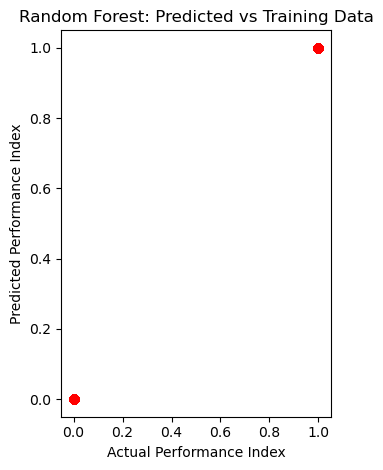

In [137]:
# Scatter plot for Support Vector Machine Classifier on Test Data
plt.subplot(1, 2, 2)
plt.scatter(y_test, NB_model_pred, color='red')
plt.title('Random Forest: Predicted vs Training Data')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')

plt.tight_layout()
plt.show()

# Confusion Metrix and Classification report of out best model - Naive Bayes

In [140]:
print(f'Naive Bayes Model')
print(f'Accuracy: {NB_accuracy}')
print(f'Classification Report:\n{NB_class_rep}')
print('-' * 50)

Naive Bayes Model
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1726
           1       1.00      1.00      1.00      1654

    accuracy                           1.00      3380
   macro avg       1.00      1.00      1.00      3380
weighted avg       1.00      1.00      1.00      3380

--------------------------------------------------


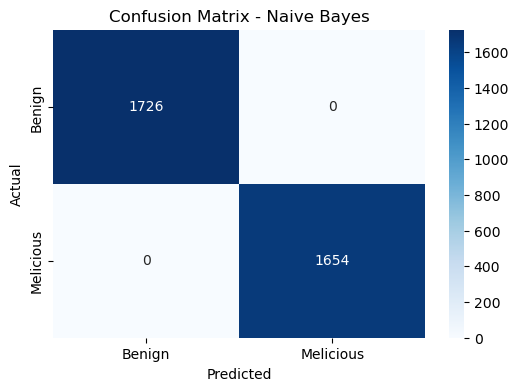

In [142]:
plt.figure(figsize=(6, 4))
sns.heatmap(NB_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Melicious'], yticklabels=['Benign', 'Melicious'])
plt.title(f'Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Metrix and Classification report of other three models 

In [147]:
# Logistic Regression
print(f'Logistic Regression Model')
print(f'Accuracy: {LR_accuracy}')
print(f'Classification Report:\n{LR_class_rep}')
print('-' * 50)

# SVC
print(f'Support vactor Machine Model')
print(f'Accuracy: {SVC_accuracy}')
print(f'Classification Report:\n{SVC_class_rep}')
print('-' * 50)


# RF
print(f'Random Forest Model')
print(f'Accuracy: {RF_accuracy}')
print(f'Classification Report:\n{RF_class_rep}')
print('-' * 50)

Logistic Regression Model
Accuracy: 0.9994082840236687
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1726
           1       1.00      1.00      1.00      1654

    accuracy                           1.00      3380
   macro avg       1.00      1.00      1.00      3380
weighted avg       1.00      1.00      1.00      3380

--------------------------------------------------
Support vactor Machine Model
Accuracy: 0.9997041420118343
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1726
           1       1.00      1.00      1.00      1654

    accuracy                           1.00      3380
   macro avg       1.00      1.00      1.00      3380
weighted avg       1.00      1.00      1.00      3380

--------------------------------------------------
Random Forest Model
Accuracy: 0.9997041420118343
Classification Report:
             

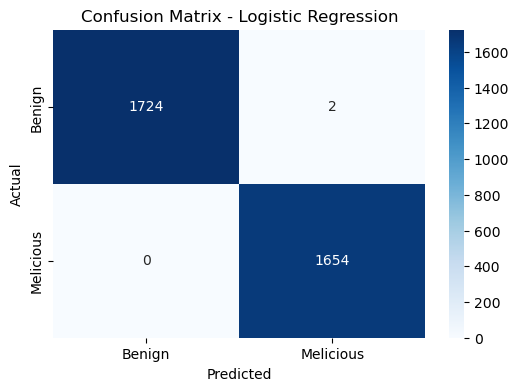

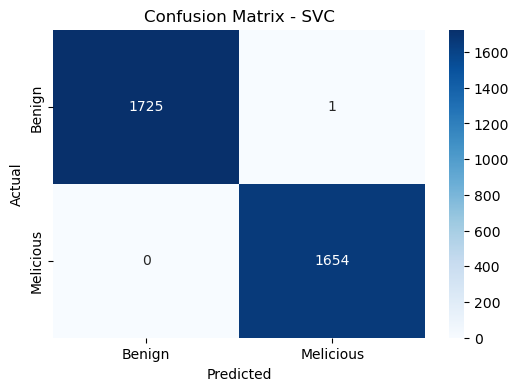

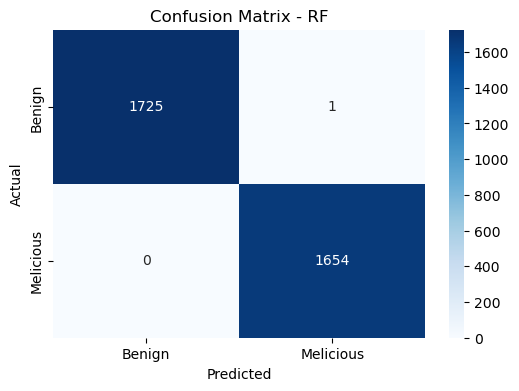

In [149]:
# Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(LR_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Melicious'], yticklabels=['Benign', 'Melicious'])
plt.title(f'Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVC
plt.figure(figsize=(6, 4))
sns.heatmap(SVC_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Melicious'], yticklabels=['Benign', 'Melicious'])
plt.title(f'Confusion Matrix - SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# NB
plt.figure(figsize=(6, 4))
sns.heatmap(RF_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Melicious'], yticklabels=['Benign', 'Melicious'])
plt.title(f'Confusion Matrix - RF')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# !------------------------- Model Validation ---------------------------!
 - Calculating Accuracy Score and Plotting Accuracy Curve for each of the model by using Cross validation technique.
 - Reason for doing this is to validate our model performance

In [142]:
from sklearn.model_selection import cross_val_score


models = [RF_model, LR_model, SVC_model, NB_model]

print('!---------------------------------------------------------------')
print('Cross Validation Results before selected features: ')
for model in models:
    scores = cross_val_score(model, X, y, cv=5)
    print(f"Cross-validation scores for model {model} is : {scores}")
    print(f"Mean CV score: {scores.mean()}")



# Selected Features
models_sf = [RF_model_sf, LR_model_sf, SVC_model_sf, NB_model_sf]

print('!---------------------------------------------------------------')
print('Cross Validation Results After selected features: ')
for model in models_sf:
    scores = cross_val_score(model, X_sel_features, y, cv=5)
    print(f"Cross-validation scores for model {model} is : {scores}")
    print(f"Mean CV score: {scores.mean()}")



!---------------------------------------------------------------
Cross Validation Results before selected features: 
Cross-validation scores for model RandomForestClassifier(random_state=42) is : [1.         1.         1.         1.         0.99792838]
Mean CV score: 0.9995856762355727


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores for model LogisticRegression(random_state=42) is : [0.99970414 0.99940828 0.99171598 0.99112163 0.99112163]
Mean CV score: 0.9946143339211384
Cross-validation scores for model SVC(random_state=42) is : [0.75769231 0.95443787 0.94556213 0.85469074 0.85498668]
Mean CV score: 0.8734739454094292
Cross-validation scores for model GaussianNB() is : [0.51183432 0.50946746 0.5112426  0.50932228 0.99112163]
Mean CV score: 0.6065976594034509
!---------------------------------------------------------------
Cross Validation Results After selected features: 
Cross-validation scores for model RandomForestClassifier(random_state=42) is : [1.         1.         1.         1.         0.99112163]
Mean CV score: 0.9982243267238828


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores for model LogisticRegression(random_state=42) is : [0.99940828 0.99970414 1.         0.99970405 0.99289731]
Mean CV score: 0.998342757477003
Cross-validation scores for model SVC(random_state=42) is : [0.78372781 0.97248521 0.94733728 0.85824208 0.74696656]
Mean CV score: 0.8617517874935864
Cross-validation scores for model GaussianNB() is : [1.         1.         1.         1.         0.99260136]
Mean CV score: 0.9985202722699024
